<a href="https://colab.research.google.com/github/pdpranavkumar/Data-Science-Portfolio/blob/main/Boston_Housing_Dataset_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


**Linear Regreesion is one of the fundamental machine learning techniques in data science.
It makes predictions by discovering the best fit line that reaches the most points. 
Once it learns, it can start to predict prices, weight, and more. 
In this project using Linear Regression to Model and Predict Housing Prices with the Boston Housing Dataset, I will run through the steps to create a linear regression model using appropriate features, data, and analyze my results.**

#Load Libraries and Datasets

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [79]:
#load Dataset from sklearn
from sklearn.datasets import load_boston

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
path="/content/drive/MyDrive/Almabetter/housing.csv"
housing_df = pd.read_csv(path)

In [82]:
# load Data
boston = load_boston()

# data is in dictionary, Populate dataframe with data key
df = pd.DataFrame(boston.data)

# columns are indexed, Fill in Column names with feature_names key
df.columns = boston.feature_names

# we need Median Value! boston.data contains only the features, no price value.
df['MEDV'] = pd.DataFrame(boston.target)
df.shape 

# our dataset contains 506 data points and 14 columns
# here is a glimpse of our data first 3 rows
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


#Below are our definitions of each feature name in housing dataset

*  CRIM - per capita crime rate by town
*  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*  INDUS - proportion of non-retail business acres per town.
*  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*  PTRATIO - pupil-teacher ratio by town
*  NOX - nitric oxides concentration (parts per 10 million)
*  RM - average number of rooms per dwelling
*  AGE - proportion of owner-occupied units built prior to 1940
*    B - 1000 (Bk - 0.63) ^ 2 where Bk is the proportion of blacks by town
*  DIS - weighted distances to five Boston employment centres
*  RAD - index of accessibility to radial highways
*  TAX - full-value property-tax rate per $10,000

*  LLSTAT - % lower status of the population
*  MEDV - Median value of owner-occupied homes in $1000's
*  MEDV is the dependent variable.








# Prepare Dataset For Modeling 




***Missing Data***
#Let's check if we have any missing data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


It doesn’t show null values but when we look at df.head() from above, we can see that there are values of 0 which can also be missing values.
For good measure, we’ll turn the 0 values into np.nan where we can see what is missing.

In [84]:
#first we replace the 0 values with the np.nan values
df.replace(0, np.nan, inplace = True)

In [85]:
#check the percentage of each column data is missing
df.isnull().sum()/len(df)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

This shows that ZN has 73% and CHAS has 93% of missing data.We can leave it because they don not give us enough information for our regression model to interpret.


In [86]:
#drop ZN and CHAS with too many misiing columns
df = df.drop('ZN', axis = 1) 
df = df.drop('CHAS', axis = 1) 

In [87]:
 df.head(5)

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Check Multicollinearity
It’s helpful to see which features increase/decrease together. Features that correlate together may make interpretability of their effectiveness difficult. An analogy that someone made on stackoverflow was that if you want to measure the strength of two people who are pushing the same boulder up a hill, it’s hard to tell who is pushing at what rate. 



In [88]:
import seaborn as sns


In [89]:
#steps to remove reduntant values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

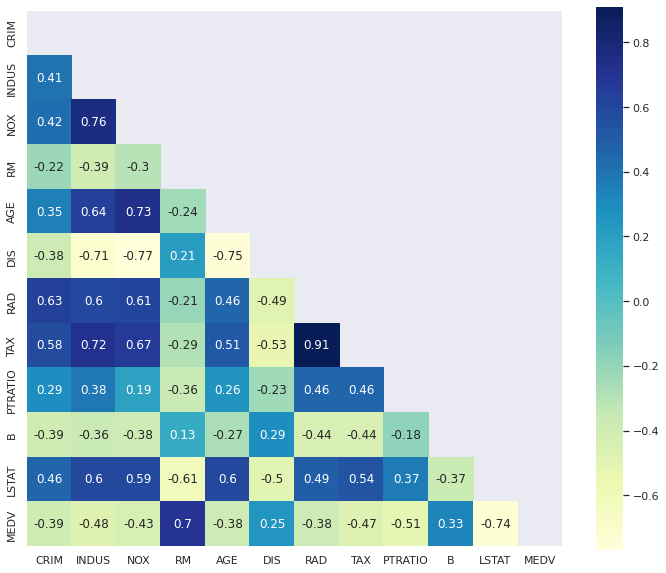

In [90]:
sns.set(rc={'figure.figsize': (12,10)})
sns.heatmap(df.corr().round(2), square=True, cmap='YlGnBu', annot=True, mask=mask);

From the above heatmap analysis
If,I set a cut off for high correlation to be +-75,we can see that:
*   TAX and RAD have high correlation of 0.91
*   DIS and NOX have high correlation of -0.77
*   NOX and INDUS have high correlation of 0.76
*   MEDV has high correlation with RM and LSTAT 0.7 and -0.74



In [91]:
#drop the correlated values
columns = ['TAX', 'RAD', 'NOX', 'INDUS','DIS']
df = df.drop(columns=columns) 

# Explore Dataset

I'm going to create a loop to plot each relationship between a feature and target variable MEDV(MEdian price). We will be able to see which features having linear relationship.

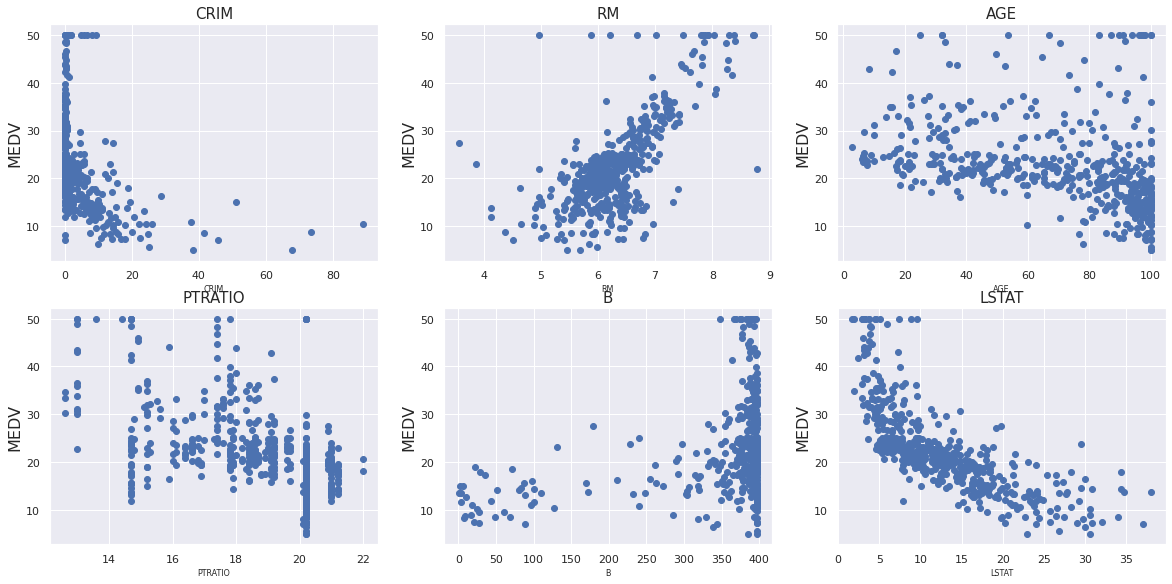

In [92]:
#create multiple plots
features = df.drop('MEDV', 1).columns
target = df['MEDV']
plt.figure(figsize=(20,20))
for index,feature_name in enumerate(features):
  #4 rows of plots,13/3 == 4 plots per row, index+1 where the plot begins
  plt.subplot(4,len(features)/2,index+1)
  plt.scatter(df[feature_name],target)
  plt.title(feature_name, fontsize=15)
  plt.xlabel(feature_name, fontsize=8)
  plt.ylabel('MEDV', fontsize=16)

**Linear Relationships**

LSTAT and RM look like the only ones that have some sort of linear relationship.We can use these two features.As part of the assumptionsof linear regression,it is important because this model is trying to understand the linear relationship between the feature and dependent variable.the model may underfit as a result of non checking this assumption.It underfits because if we draw a line through the data points in a non-linear relationship.the line would not be capture as much as the data.


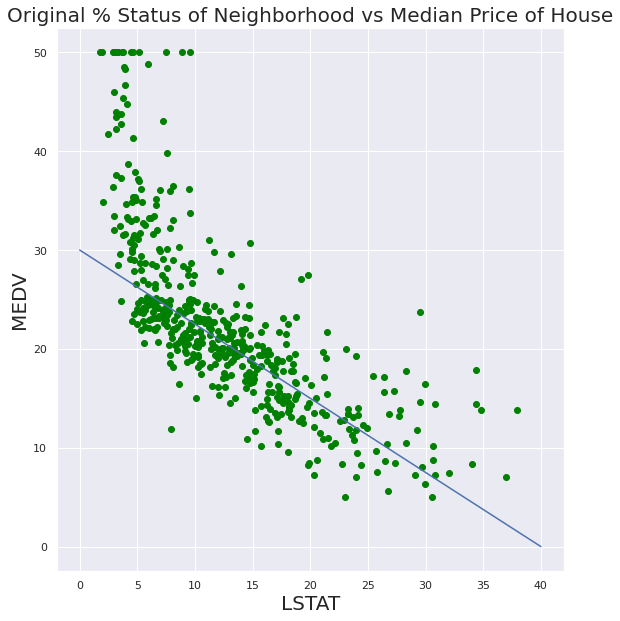

In [93]:
df["LOGLSTAT"] = df["LSTAT"].apply(np.log)
plt.figure(figsize=(20,10))

# showing plot 1
plt.subplot(1,2,1)
plt.scatter(df["LSTAT"], df['MEDV'], color='green')
plt.title('Original % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('LSTAT',fontsize=20);
plt.ylabel('MEDV',fontsize=20);
plt.plot([0,40],[30,0])


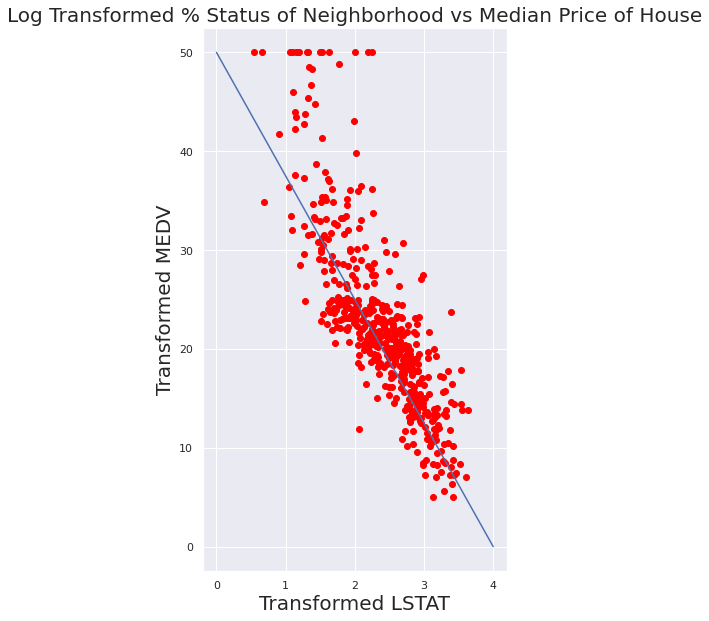

In [94]:
# showing plot 2
plt.subplot(1,2,2)
plt.scatter(df["LOGLSTAT"], df['MEDV'], color='red')
plt.title('Log Transformed % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('Transformed LSTAT',fontsize=20);
plt.ylabel('Transformed MEDV',fontsize=20);
plt.plot([0,4],[50,0])


#Apply global parameters
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.show()

In the LSTAT we could not fit the data right through in one slot from corner to corner.

I had to change where my line fits through to capture more data.

After the transformed we are able to minimize the nonlinear relationship,it's better now.


# Create Model 

First we create our list of features and our target variable.These are the values that we will train and test our values on.One author uses.values and another does not.Not sure what the difference is but I would like to find out.


In [95]:
x = df[['LOGLSTAT','RM']]
y = df.MEDV

Let's create our tain split data.

We need the training set to teach our model about the true values and then we'll use what it learned to predict our prices.

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 10 )

In [97]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(339, 2)
(339,)
(167, 2)
(167,)


#Now  we instantiate a Linear Regression object,fit the training data and then predict.

In [98]:
#create the Linear Regression instance
lrm = LinearRegression()

#fit data on to the model
lrm.fit(x_train,y_train)

#predict
y_predicted = lrm.predict(x_test)

Let’s evaluate how well our model did using metrics r-squared and root mean squared error. The r-squared value shows how strong our features determined the target value. The rmse defines the difference between predicted and the test values. The higher the value of the rmse, the less accurate the model.

#Evaluate Model with the Metrics

In [99]:
def linear_metrics():
  r2 = lrm.score(x_test, y_test)
  rmse = (np.sqrt(mean_squared_error(y_test,y_predicted)))
  print('r_squared: {}'.format(r2))
  print('----------------------------')
  print('root mean squared error:{}'.format(rmse))

In [100]:
linear_metrics()

r_squared: 0.7155988559379332
----------------------------
root mean squared error:5.214330262011093


# Actual Vs. Predicted price Plot

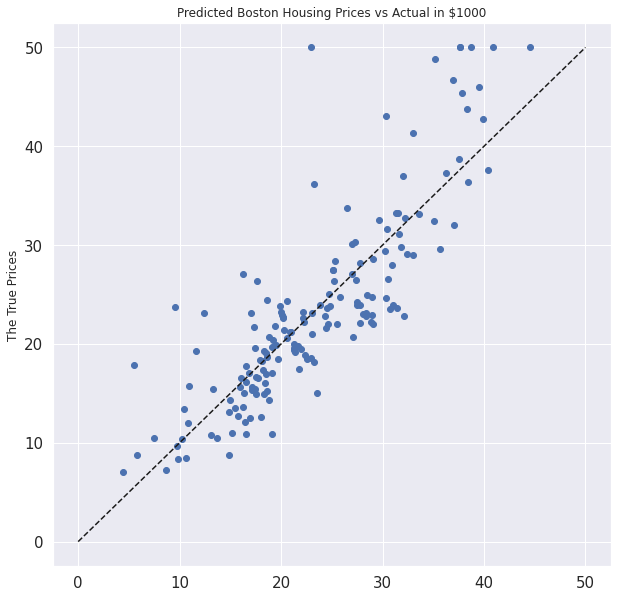

In [104]:
#plot my predictions vs actual

plt.figure(figsize=(10,10))
plt.scatter(y_predicted, y_test)
plt.plot([0, 50],[0,50],'--k')
plt.axis('tight')
plt.ylabel('The True Prices');
plt.title('Predicted Boston Housing Prices vs Actual in $1000');

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

## Plot the Residual Errors

The closer we can get the points to be at the 0 line,the more accurate the model is at the predicting the prices.

Variance score: 0.7155988559379332


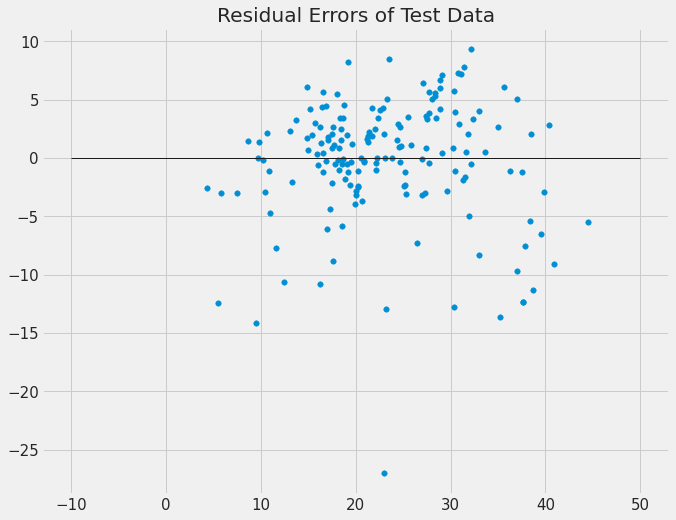

In [109]:
#create Residuals Function

def residuals():
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8))
    plt.scatter(lrm.predict(x_test), lrm.predict(x_test) - y_test, s=30)
    plt.xlabel('')
    plt.title('Residual Errors of Test Data')
    plt.hlines(0, xmin=-10, xmax=50, linewidth=1);

# the closer to 1, the more perfect the prediction
print('Variance score: {}'.format(lrm.score(x_test, y_test)))


residuals()

# Insights from the data

In [110]:
#combine coefficient with their value
coeff = list(zip(x, lrm.coef_))

#sort keys by value of coefficient
print(['y-intercept = {}'.format(lrm.intercept_), sorted(coeff, key= lambda x: x[1])])

['y-intercept = 25.776075087831263', [('LOGLSTAT', -9.968206663480519), ('RM', 3.231085381986439)]]


## Log Transformed Coefficient Understanding

*   For every one percent increase in the independent variable, the dep. variable changes by: coefficient * ln(1.01)
*   ln(1.01) or ln(101/100) is also equal to just about 1%
*   If you want to see a different percent increase, you can put ln(1.10) - a 10% increase
*  log(coefficient) follows a log-normal distribution
*  ln(coefficient) follows a normal distribution









#Analysis

*   The y-intercept can be interpreted that in general the starting price of a house in Boston 1979 would be around 25K-26K.
*   ‘RM’, or rooms per home, at 3.23 can be interpreted that for every room, the price increases by 3K.
*   The Log Transformed ‘LSTAT’, % of lower status, can be interpreted as for every 1% increase of lower status, using the formula -9.96*ln(1.01), then our median value will decrease by 0.09, or by 100 dollars.

#Conslusion
 In this project we applied the concepts of linear regression on the Boston housing dataset in an extensive detailed way. 